## Car price prediction based on its attributes

In this project we will use a KNN regressor to predict car prices based on different properties recorded in the [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile) available from the UCI Machine Learning Repository.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
header = ["symboling", "normalized_losses", "make", "fuel_type",
         "aspiration", "num_doors", "body_style", "drive_wheels",
         "engine_location", "wheel_base", "length", "width", "height",
         "curb_weight", "engine_type", "num_cylinders", "engine_size",
         "fuel_system", "bore", "stroke", "compression_ratio", "horsepower",
         "peak_rpm", "city_mpg", "highway_mpg", "price"]
cars = pd.read_csv("imports-85.data", names=header)

In [3]:
cars.head()

symboling normalized_losses         make fuel_type aspiration num_doors  \
0          3                 ?  alfa-romero       gas        std       two   
1          3                 ?  alfa-romero       gas        std       two   
2          1                 ?  alfa-romero       gas        std       two   
3          2               164         audi       gas        std      four   
4          2               164         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...    engine_size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway_mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

First we replace all the missing values with NaN that pandas can recognize easily. After the replacment we have to convert columns which contained null values to numeric if applicable.

In [4]:
cars.replace("?", np.nan, inplace=True)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

In [6]:
cars[["normalized_losses", "bore", "stroke", 
    "horsepower", "peak_rpm", "price"]] = cars[["normalized_losses", "bore", "stroke", 
    "horsepower", "peak_rpm", "price"]].astype("float")

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [8]:
cars["normalized_losses"].isnull().sum()

41

The column describing normalized losses contains the largest amount of missing values, 41 in total. Other columns have few missing values. The best solution to handle normalized-loss missing values in this case is to replace them with mean for the column, to minimize the information loss. Afterwards we can only keep numeric columns that we can use to train KNN model and normalize them to have a mean of 0 and standard deviation of 1.

In [9]:
cars.loc[cars["normalized_losses"].isnull(), "normalized_losses"] = np.mean(cars["normalized_losses"])

In [10]:
cars = cars.dropna()

In [11]:
features = cars.mean().index

In [12]:
cars = cars[features]

In [13]:
normalized_cars = (cars - cars.mean()) / cars.std()
normalized_cars["price"] = cars["price"]

In [14]:
normalized_cars.head()

symboling  normalized_losses  wheel_base    length     width    height  \
0   1.782215           0.022108   -1.678015 -0.442872 -0.839080 -2.117092   
1   1.782215           0.022108   -1.678015 -0.442872 -0.839080 -2.117092   
2   0.163544           0.022108   -0.719041 -0.250543 -0.184200 -0.613816   
3   0.972880           1.320702    0.142410  0.182198  0.143240  0.179580   
4   0.972880           1.320702    0.077395  0.182198  0.236794  0.179580   

   curb_weight  engine_size      bore    stroke  compression_ratio  \
0    -0.025646     0.045098  0.511697 -1.803495          -0.287525   
1    -0.025646     0.045098  0.511697 -1.803495          -0.287525   
2     0.496473     0.574066 -2.388614  0.701095          -0.287525   
3    -0.426254    -0.459826 -0.516262  0.479169          -0.036110   
4     0.498371     0.189362 -0.516262  0.479169          -0.538940   

   horsepower  peak_rpm  city_mpg  highway_mpg    price  
0    0.198054 -0.212806 -0.677292    -0.555613  13495.0  
1    0.198054 -0.212806 -0.677292    -0.555613  16500.0  
2    1.330822 -0.212806 -0.990387    -0.702307  16500.0  
3   -0.039037  0.853987 -0.207649    -0.115531  13950.0  
4    0.303427  0.853987 -1.146935    -1.289083  17450.0

In [38]:
def knn_train_test(train_cols, target_col, df, k=5):
    #train test split
    train_df = df.iloc[:round(0.75*len(df))]
    test_df = df.iloc[round(0.75*len(df)):]
    
    # model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    return np.sqrt(mean_squared_error(test_df["price"], predictions))

### Univariate models

In [19]:
univariate_rmse = dict()
for column in normalized_cars.columns[normalized_cars.columns != "price"]:
    rmse = knn_train_test(column, "price", normalized_cars)
    univariate_rmse[column] = rmse

In [20]:
univariate_rmse

{'bore': 9243.401270906723,
 'city_mpg': 3761.1956393545925,
 'compression_ratio': 7168.8802743176,
 'curb_weight': 2073.3133112645246,
 'engine_size': 3409.1132131391587,
 'height': 6472.069270720146,
 'highway_mpg': 2682.8725628201823,
 'horsepower': 3963.2987756413213,
 'length': 7150.0239824772625,
 'normalized_losses': 7606.625948255025,
 'peak_rpm': 7317.281789480754,
 'stroke': 8071.355338944011,
 'symboling': 7975.113840514546,
 'wheel_base': 5697.712399214852,
 'width': 4266.502957048078}

With the default value for the number of nearest neighbors of 5, the feature that performed best in terms of the RMSE is the curb weight. We will now examine different values for the numbers of neighbors, and see which one leads to best results.

In [24]:
k_list = np.arange(1, 11, 2)

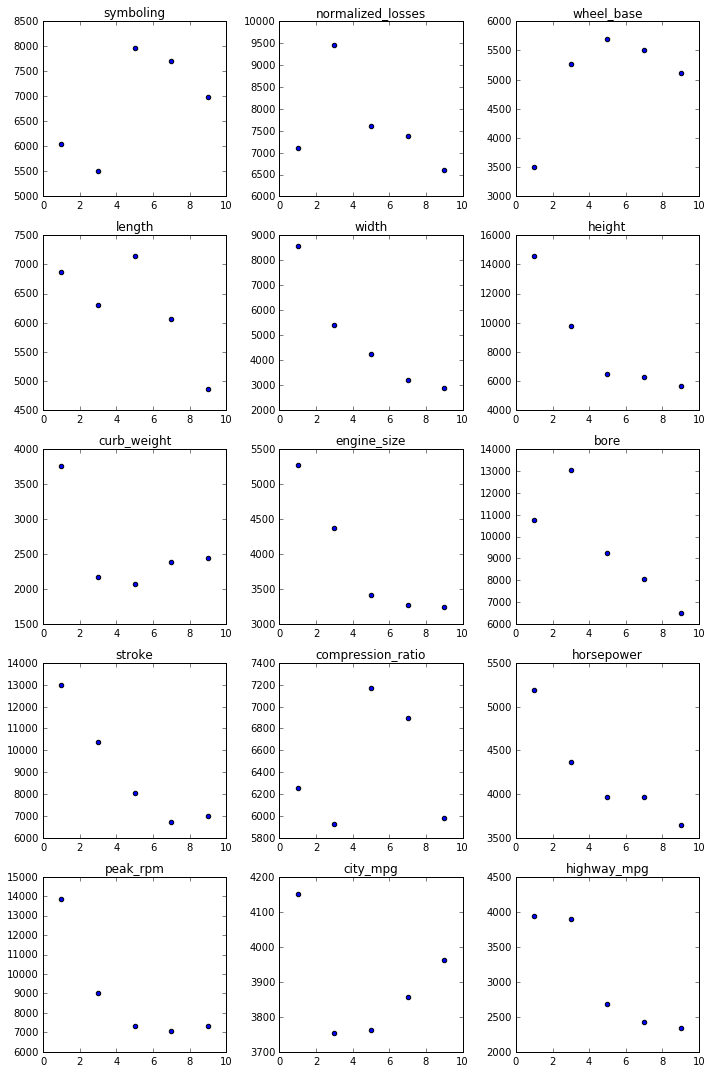

In [35]:
fig = plt.figure(figsize=(10, 15))

img = 1
for column in normalized_cars.columns[normalized_cars.columns != "price"]:
    rmse_list = []
    for k in k_list:
        rmse = knn_train_test(column, "price", normalized_cars, k)
        rmse_list.append(rmse)
    ax = fig.add_subplot(5, 3, img)
    ax.scatter(k_list, rmse_list)
    ax.set_title(column)
    img +=1

plt.tight_layout()

Varying the number of neighbours does not change the story drastically, in most cases the RMSE drops as we increase the number of neighbours used. However, curb weight still performs the best amongst the univariate models, followed by using highway mpg as the predictor.

### Multivariate models
In this section we will add multiple predictors at the same time, we start of with the two best predictors from the univariate analysis, and then add one at a time until we have five predictors in the model.

In [36]:
two_feat = ["curb_weight", "highway_mpg"]
three_feat = ["curb_weight", "highway_mpg", "engine_size"]
four_feat = ["curb_weight", "highway_mpg", "engine_size", "horsepower"]
five_feat = ["curb_weight", "highway_mpg", "engine_size", "horsepower", "width"]

In [39]:
rmse_two = knn_train_test(two_feat, "price", normalized_cars)
rmse_three = knn_train_test(three_feat, "price", normalized_cars)
rmse_four = knn_train_test(four_feat, "price", normalized_cars)
rmse_five = knn_train_test(five_feat, "price", normalized_cars)
multi_models = {"two_feat":rmse_two, "three_feat":rmse_three, 
                "four_feat":rmse_four, "five_feat":rmse_five}

In [40]:
multi_models

{'five_feat': 3086.6285399013163,
 'four_feat': 3369.8915819602666,
 'three_feat': 3002.950841394732,
 'two_feat': 2690.317493190472}

In the following we will keep the three best models and vary the hyperparameter k to find the optimal value and the optimal model.

In [41]:
k_list = np.arange(1, 26)

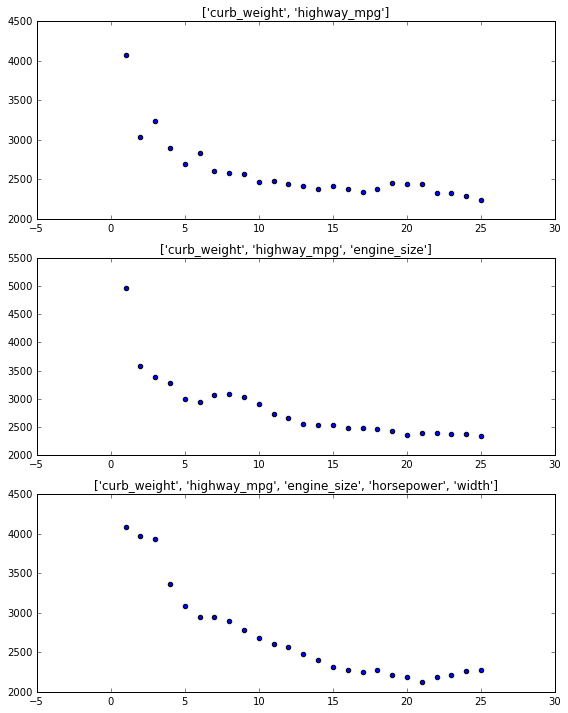

In [44]:
fig = plt.figure(figsize=(8, 10))

models = [two_feat, three_feat, five_feat]
img = 1
for model in models:
    rmse_list = []
    for k in k_list:
        rmse = knn_train_test(model, "price", normalized_cars, k)
        rmse_list.append(rmse)
    ax = fig.add_subplot(3, 1, img)
    ax.scatter(k_list, rmse_list)
    ax.set_title(model)
    img +=1

plt.tight_layout()

Optimal value of the hyper parameter k for the models with two and three predictors is 25, while for the five feature model the optimal value of k is 21. Hyper parameters values are very similar, most likely because strong correlation exists between variables such as curb weight, engine size, widht, and highway mpg.